## Project

### Problem definition

1) Ethereum is a decentralized blockchain platform that establishes a peer-to-peer network that
securely executes and verifies application code, called smart contracts. A transaction once done
can’t be undone in blockchain network. So it is very important to identify any illegal transactions
in the network and prevent them from corrupting the entire blockchain network.

2) The goal of this project is to build a machine learning model which classifies a given transaction as fraud or
valid transaction.

3) We will use F1 score and Area under ROC curve as the metrics.

### Data
1. Download the data from this link https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset/data. Copy the transaction_dataset.csv in the download folder to data/

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=Warning)

In [2]:
# Load the transactions data
df = pd.read_csv('data/transaction_dataset.csv')

# Sample transactions
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [3]:
df.shape

(9841, 51)

### Preprocessing

In [4]:
# Stats of the features
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [5]:
# NaNs in each features
df.isna().sum()

Unnamed: 0                                                0
Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                            

In [6]:
# number of distinct values in each features
df.nunique()

Unnamed: 0                                              9841
Index                                                   4729
Address                                                 9816
FLAG                                                       2
Avg min between sent tnx                                5013
Avg min between received tnx                            6223
Time Diff between first and last (Mins)                 7810
Sent tnx                                                 641
Received Tnx                                             727
Number of Created Contracts                               20
Unique Received From Addresses                           256
Unique Sent To Addresses                                 258
min value received                                      4589
max value received                                      6302
avg val received                                        6767
min val sent                                            4719
max val sent            

### Removing irrelevent features and records

1. The features 'Index', 'Unnamed: 0' are just row numbers, they are not relavent to our problem.
2. The feature 'Address' is a random number given to the each node in the blockchain network. It's a value used to identify the node in the network. So feature 'Address' doesn't have any influence of on the transaction type and is  not relavent to our problem. 
3. From the number of distinct values in each features above we can see that there are 7 features with only one value. Keeping these in the model data is not relevent (since all transactions have same value) in predicting the type of transaction.
4. The features ' ERC20 most sent token type' and ' ERC20_most_rec_token_type' have garbage data, so removing.
5. Removing the records which have NaN values beacuse we cannot fill them with random values or mean values becuase each transaction is different and filling them may add bias to the data.
6. Dropping the duplicates

In [7]:
df = df.drop(['Index'], axis = 1)
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Address'], axis = 1)
df = df.drop([' ERC20 most sent token type'], axis = 1)
df = df.drop([' ERC20_most_rec_token_type'], axis = 1)
df = df.drop([' ERC20 avg time between sent tnx'], axis = 1)
df = df.drop([' ERC20 avg time between rec tnx'], axis = 1)
df = df.drop([' ERC20 avg time between rec 2 tnx'], axis = 1)
df = df.drop([' ERC20 avg time between contract tnx'], axis = 1)
df = df.drop([' ERC20 min val sent contract'], axis = 1)
df = df.drop([' ERC20 max val sent contract'], axis = 1)
df = df.drop([' ERC20 avg val sent contract'], axis = 1)
df = df.dropna()
df = df.drop_duplicates()

### Balancing dataset

In [8]:
print("Number of invalid transaction in data = " +str(np.sum(np.where(df['FLAG']==1,1,0))))
print("Number of valid transaction in data = " +str(np.sum(np.where(df['FLAG']==0,1,0))))

Number of invalid transaction in data = 1107
Number of valid transaction in data = 7632


In [9]:
Y = df['FLAG']
X = df.drop(['FLAG'], axis = 1)

In [10]:
# Balancing data 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X, Y = ros.fit_resample(X, Y)
print("X dimensions = "+str(X.shape))
print("Y dimensions = "+str(Y.shape))

X dimensions = (15264, 38)
Y dimensions = (15264,)


In [11]:
print("Number of invalid transaction in data after balancing = " +str(np.sum(np.where(Y==1,1,0))))
print("Number of valid transaction in data after balancing = " +str(np.sum(np.where(Y==0,1,0))))

Number of invalid transaction in data after balancing = 7632
Number of valid transaction in data after balancing = 7632


### Data reduction

Number of pairs of feaures which have correlation coefficient > 0.8 = 13.0
Correlation plot:


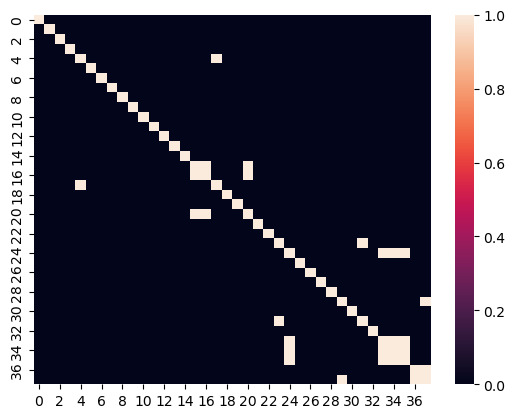

In [12]:
# Correlation of data
import seaborn as sns
import matplotlib.pyplot as plt

correlation = X.corr()
correlation_count = (np.sum(np.where(np.abs(correlation)>0.8,1,0)) - correlation.shape[0])/2
print("Number of pairs of feaures which have correlation coefficient > 0.8 = " + str(correlation_count))

print("Correlation plot:")
sns.heatmap(np.where(np.abs(correlation)>0.8,1,0));

Perform PCA and reduce the number of features from 38 to 25. (Removing one of the feature from each 13 pair highly correlated featured)

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=25).fit_transform(X_scaled)

### Data split
Data is divided randomly into train, validation and test data with 60% in train, 20% in validation and 20% in test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [15]:
print("Train data shape = "+str(X_train.shape))
print("Validation data shape = "+str(X_val.shape))
print("Test data shape = "+str(X_test.shape))

Train data shape = (9158, 25)
Validation data shape = (3053, 25)
Test data shape = (3053, 25)


### Models

    1) Logistic regression
    2) Decision tree
    3) AdaBoostClassifier (ensemble method with Decision tree as base estimator)
    4) Support Vector Machines (with 'linear', 'poly', 'rbf', 'sigmoid' kernels)
    5) Neural Network (MLPClassifier)

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

### Logistic Regression
1. Used the default parameters of the model. So, L2 regularization with regularization strength(C) = 1.0

In [17]:
## Logistic regression
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state=42).fit(X_train, Y_train)

Y_train_pred = LR_model.predict_proba(X_train)[:, 1]
Y_val_pred = LR_model.predict_proba(X_val)[:, 1]
Y_test_pred = LR_model.predict_proba(X_test)[:, 1]

f1score_train = f1_score(Y_train, Y_train_pred>0.5)
f1score_val = f1_score(Y_val, Y_val_pred>0.5)
f1score_test = f1_score(Y_test, Y_test_pred>0.5)

print("Train F1 score = "+str(f1score_train))
print("Validation F1 score = "+str(f1score_val))
print("Test F1 score = "+str(f1score_test))

auc_train = roc_auc_score(Y_train, Y_train_pred)
auc_val = roc_auc_score(Y_val, Y_val_pred)
auc_test = roc_auc_score(Y_test, Y_test_pred)

print("\nTrain AUC = "+str(auc_train))
print("Validation AUC = "+str(auc_val))
print("Test AUC = "+str(auc_test))

Train F1 score = 0.7419354838709677
Validation F1 score = 0.7468926553672317
Test F1 score = 0.7357452966714907

Train AUC = 0.8211310862666497
Validation AUC = 0.8350363133551925
Test AUC = 0.8171074190771364


##### Comment on logistic regresion model:    
1. From the F1 score we can see that this model is not doing a good job.
2. F1 score of train, validation & test data is in the range of 0.73 - 0.75

### Decision Tree
1. Used Entropy as the impurity measure

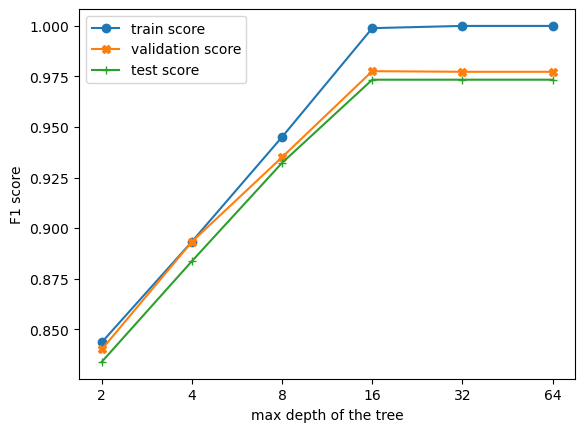

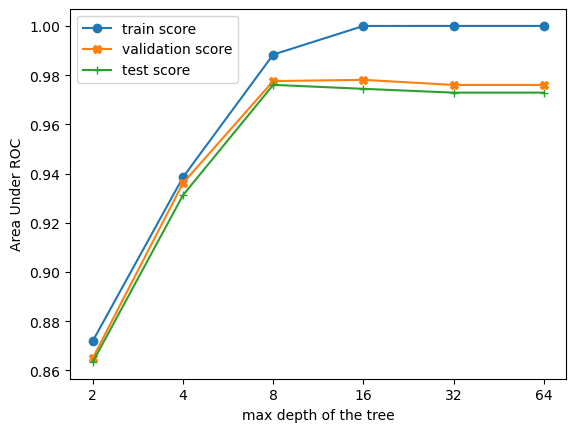

In [18]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

max_depths = [2,4,8,16,32,64]
DT_train_f1score = []
DT_val_f1score = []
DT_test_f1score = []

DT_train_aucscore = []
DT_val_aucscore = []
DT_test_aucscore = []

for depth in max_depths:
    DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42).fit(X_train, Y_train)
    
    Y_train_pred = DT_model.predict_proba(X_train)[:, 1]
    Y_val_pred = DT_model.predict_proba(X_val)[:, 1]
    Y_test_pred = DT_model.predict_proba(X_test)[:, 1]

    f1score_train = f1_score(Y_train, Y_train_pred>0.5)
    f1score_val = f1_score(Y_val, Y_val_pred>0.5)
    f1score_test = f1_score(Y_test, Y_test_pred>0.5)
    
    DT_train_f1score.append(f1score_train)
    DT_val_f1score.append(f1score_val)
    DT_test_f1score.append(f1score_test)
    
    auc_train = roc_auc_score(Y_train, Y_train_pred)
    auc_val = roc_auc_score(Y_val, Y_val_pred)
    auc_test = roc_auc_score(Y_test, Y_test_pred)
    
    DT_train_aucscore.append(auc_train)
    DT_val_aucscore.append(auc_val)
    DT_test_aucscore.append(auc_test)


plt.plot([str(i) for i in max_depths], DT_train_f1score, 'o-', label = "train score")
plt.plot([str(i) for i in max_depths], DT_val_f1score, 'X-', label = "validation score")
plt.plot([str(i) for i in max_depths], DT_test_f1score, '+-', label = "test score")
plt.xlabel("max depth of the tree")
plt.ylabel("F1 score")
plt.legend()
plt.show()

plt.plot([str(i) for i in max_depths], DT_train_aucscore, 'o-', label = "train score")
plt.plot([str(i) for i in max_depths], DT_val_aucscore, 'X-', label = "validation score")
plt.plot([str(i) for i in max_depths], DT_test_aucscore, '+-', label = "test score")
plt.xlabel("max depth of the tree")
plt.ylabel("Area Under ROC")
plt.legend()
plt.show()

##### Comments on Desicion tree

1. Desicion tree with max_depths = [2,4,8,16,32,64] are build on this data
2. Even with the max_depth = 2, the F1 score of desicion tree model is more then logistic regression model. But the F1 score is still less for desicion tree with max_depth = 2 (~0.83)
3. As the max_depth of the desicion tree increases we can see the increase in the F1 score (from max_depth = 2 to max_depth = 16)
4. But when the max_depth still increases(>16) we can see overfitting. The F1 score of train data increases but the validation and test F1 scores are slightly decreases or remains almost same.
5. At max_depth=16 the F1 score of train, validation & test data is in the range of 0.96 - 0.98. Which is far better than logistic regression model and is good enough.
6. We will use ensemble method AdaBoost to improve the F1 scores.

### Decision Tree with AdaBoostClassifier

Adaptive boosting with DecisionTreeClassifier with criterion='entropy' as base estimator

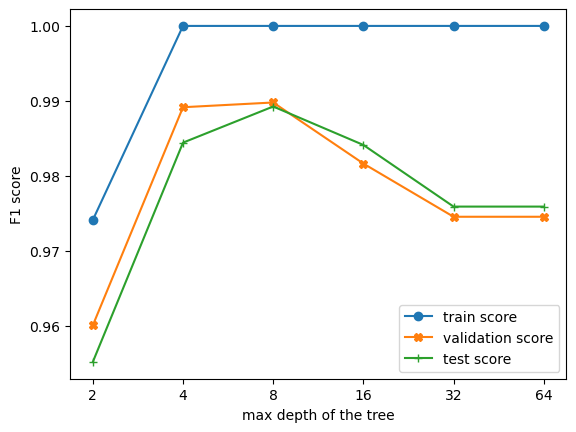

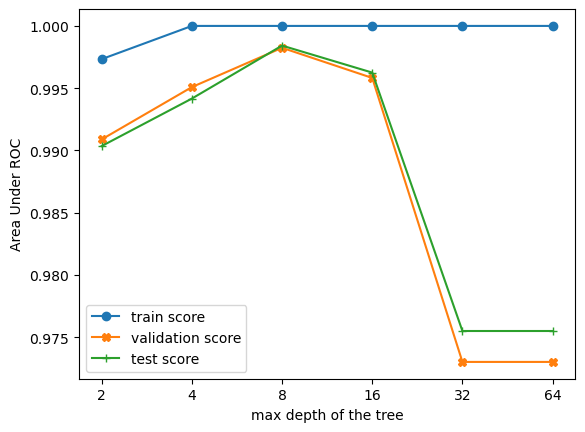

In [19]:
## Decision Tree with ADA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

max_depths = [2,4,8,16,32,64]
ABC_train_f1score = []
ABC_val_f1score = []
ABC_test_f1score = []

ABC_train_aucscore = []
ABC_val_aucscore = []
ABC_test_aucscore = []

for depth in max_depths:
    entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    ABC_model = AdaBoostClassifier(base_estimator=entropy_tree,random_state=42).fit(X_train, Y_train)
    
    Y_train_pred = ABC_model.predict_proba(X_train)[:, 1]
    Y_val_pred = ABC_model.predict_proba(X_val)[:, 1]
    Y_test_pred = ABC_model.predict_proba(X_test)[:, 1]

    f1score_train = f1_score(Y_train, Y_train_pred>0.5)
    f1score_val = f1_score(Y_val, Y_val_pred>0.5)
    f1score_test = f1_score(Y_test, Y_test_pred>0.5)
    
    ABC_train_f1score.append(f1score_train)
    ABC_val_f1score.append(f1score_val)
    ABC_test_f1score.append(f1score_test)
    
    auc_train = roc_auc_score(Y_train, Y_train_pred)
    auc_val = roc_auc_score(Y_val, Y_val_pred)
    auc_test = roc_auc_score(Y_test, Y_test_pred)
    
    ABC_train_aucscore.append(auc_train)
    ABC_val_aucscore.append(auc_val)
    ABC_test_aucscore.append(auc_test)

plt.plot([str(i) for i in max_depths], ABC_train_f1score, 'o-', label = "train score")
plt.plot([str(i) for i in max_depths], ABC_val_f1score, 'X-', label = "validation score")
plt.plot([str(i) for i in max_depths], ABC_test_f1score, '+-', label = "test score")
plt.xlabel("max depth of the tree")
plt.ylabel("F1 score")
plt.legend()
plt.show()

plt.plot([str(i) for i in max_depths], ABC_train_aucscore, 'o-', label = "train score")
plt.plot([str(i) for i in max_depths], ABC_val_aucscore, 'X-', label = "validation score")
plt.plot([str(i) for i in max_depths], ABC_test_aucscore, '+-', label = "test score")
plt.xlabel("max depth of the tree")
plt.ylabel("Area Under ROC")
plt.legend()
plt.show()

##### Comments on using AdaBoost ensemble method
1. Desicion tree with AdaBoost ensemble method for max_depths = [2,4,8,16,32,64] are build on this data
2. Even at max_depth = 2 the F1 score of AdaBoostClassifier is more that F1 score of desicion tree model and logistic regression model.
3. As the max_depth of the AdaBoostClassifier increases we can see the increase in the F1 score (from max_depth = 2 to max_depth = 8)
4. But when the max_depth still increases(>8) we can see overfitting. The F1 score of train data is already 1.0 but the validation and test F1 scores decreases.
5. For AdaBoostClassifier for max_depth=8 the F1 score of train is 1.0 and F1 score of validation & test data is in the range of 0.99 which is a very good model.
6. So AdaBoostClassifier outperforms DecisionTreeClassifier and logistic regression model and is a very good model for the probelm we are trying to solve.

### Support Vector Machines
 Three kernals 'linear', 'rbf', 'sigmoid' are used

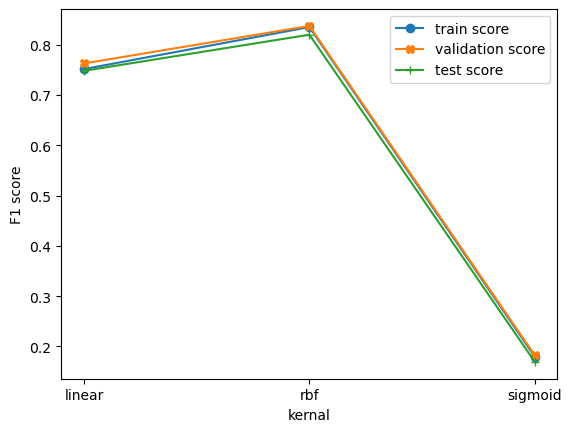

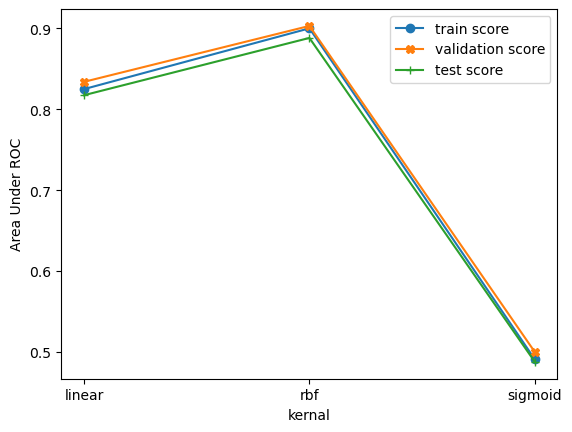

In [20]:
from sklearn.svm import SVC
kernals = ['linear', 'rbf', 'sigmoid']
SVM_train_f1score = []
SVM_val_f1score = []
SVM_test_f1score = []

SVM_train_aucscore = []
SVM_val_aucscore = []
SVM_test_aucscore = []

for kernal in kernals:
    SVM_model = SVC(kernel=kernal, probability=True, random_state=42).fit(X_train, Y_train)
    
    Y_train_pred = SVM_model.predict_proba(X_train)[:, 1]
    Y_val_pred = SVM_model.predict_proba(X_val)[:, 1]
    Y_test_pred = SVM_model.predict_proba(X_test)[:, 1]

    f1score_train = f1_score(Y_train, Y_train_pred>0.5)
    f1score_val = f1_score(Y_val, Y_val_pred>0.5)
    f1score_test = f1_score(Y_test, Y_test_pred>0.5)
    
    SVM_train_f1score.append(f1score_train)
    SVM_val_f1score.append(f1score_val)
    SVM_test_f1score.append(f1score_test)
    
    auc_train = roc_auc_score(Y_train, Y_train_pred)
    auc_val = roc_auc_score(Y_val, Y_val_pred)
    auc_test = roc_auc_score(Y_test, Y_test_pred)
    
    SVM_train_aucscore.append(auc_train)
    SVM_val_aucscore.append(auc_val)
    SVM_test_aucscore.append(auc_test)


plt.plot(kernals, SVM_train_f1score, 'o-', label = "train score")
plt.plot(kernals, SVM_val_f1score, 'X-', label = "validation score")
plt.plot(kernals, SVM_test_f1score, '+-', label = "test score")
plt.xlabel("kernal")
plt.ylabel("F1 score")
plt.legend()
plt.show()

plt.plot(kernals, SVM_train_aucscore, 'o-', label = "train score")
plt.plot(kernals, SVM_val_aucscore, 'X-', label = "validation score")
plt.plot(kernals, SVM_test_aucscore, '+-', label = "test score")
plt.xlabel("kernal")
plt.ylabel("Area Under ROC")
plt.legend()
plt.show()

##### Comments on SVM with different kernals
1. SVM with each of the 3 kernals 'linear', 'rbf', 'sigmoid' performs poorly than AdaBoostClassifier and DecisionTreeClassifier.
2. Performance of SVM and logistic regression models is approximately same.
3. F1 score is very low for all the 3 kernals. So, SVM is not a good model for the probelm we are trying to solve.

### Neural Network
Neural Network with 5 hidden layers with each layer having (20,13,10,5,3) nodes with activation='relu' (default)

In [21]:
## MLP
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier(hidden_layer_sizes = (20,13,10,5,3,), random_state=42)
NN_model.fit(X_train, Y_train)
NN_train_score = NN_model.score(X_train, Y_train)
NN_val_score = NN_model.score(X_val, Y_val)
NN_test_score = NN_model.score(X_test, Y_test)
# print(NN_train_score)
# print(NN_val_score)
# print(NN_test_score)

Y_train_pred = NN_model.predict_proba(X_train)[:, 1]
Y_val_pred = NN_model.predict_proba(X_val)[:, 1]
Y_test_pred = NN_model.predict_proba(X_test)[:, 1]

f1score_train = f1_score(Y_train, Y_train_pred>0.5)
f1score_val = f1_score(Y_val, Y_val_pred>0.5)
f1score_test = f1_score(Y_test, Y_test_pred>0.5)

print("Train F1 score = "+str(f1score_train))
print("Validation F1 score = "+str(f1score_val))
print("Test F1 score = "+str(f1score_test))

auc_train = roc_auc_score(Y_train, Y_train_pred)
auc_val = roc_auc_score(Y_val, Y_val_pred)
auc_test = roc_auc_score(Y_test, Y_test_pred)

print("\nTrain AUC = "+str(auc_train))
print("Validation AUC = "+str(auc_val))
print("Test AUC = "+str(auc_test))



Train F1 score = 0.9725576289791438
Validation F1 score = 0.9646302250803859
Test F1 score = 0.9652686762778506

Train AUC = 0.9964439345568347
Validation AUC = 0.9916619659781768
Test AUC = 0.9919289566222724


##### Comments on Neural Network 

1. F1 score of train, validation & test data is in the range of 0.96 - 0.98 which is a pretty good model for the probelm we are trying to solve.
2. This Neural Network outperforms logistic regression and Support Vector Machine (SVM).
3. Performance of this Neural Network, DecisionTreeClassifier(for width=16) is approximately same.
4. But AdaBoostClassifier(for width=8) outperforms this Neural Network model.

### Conclusion

1. AdaBoostClassifier performs better for the problem we are trying to solve.
2. F1 scores are in the range 0.99, which is reasanable score for a very good model.